### Example 4.2

Penyelesaian Example 4.2 dari Buku **An Introduction to Computational Fluid Dynamics: The Finite Volume Method** Edisi ke-2 oleh Henk Kaarle Versteeg & Weeratunge Malalasekera, Halaman 121.

Diketahui:
Tebal plat $L = 2 cm = 0.02\ m$ dengan konduktivitas $k = 0.5\ W/m.K$ dan _Uniform heat generation_ $q = 1000\ kW/m^{3}$. Pada titik A dan B memiliki suhu sebesar $100^{o}C$ dan $200^{o}C$. Lihat Gambar:

<img src="42fig46.jpg" />

Persamaan Pengatur:
$$\frac{\mathrm{d}}{\mathrm{d}x} \left( k\frac{\mathrm{d}T}{\mathrm{d}x} \right) + q = 0$$

# Solusi

Metode ini menggunakan grid sederhana. Domain dibagi menjadi 5 kontrol volume, sehingga diketahui nilai $\delta x =\ 0.004\ m$. Grid sebagai berikut:

<img src="42fig47.jpg" />

## Noda Tengah (Titik 2, 3, 4)
Diintegrasikan persamaan pengatur:
$$ \int\limits_{\Delta V}\ \frac{d}{dx} \left( k\frac{dT}{dx} \right) \text{d}V + \int\limits_{\Delta V} q \text{d}V = 0$$

Suku pertama di integralkan seperti contoh sebelumnya, sedangkan suku kedua, dievaluasi dengan rata-rata (i.e. $\bar{S}\Delta V=q\Delta V$) pada kontrol volume. Persamaan diatas dapat ditulis:

$$\begin{aligned}
\left[ \left( k A \frac{\text{d}T}{\text{d}x} \right)_e -
\left( k A \frac{\text{d}T}{\text{d}x} \right)_w \right] 
+q \Delta V = 0 \\
\left[ k_e A \left(\frac{T_E-T_P}{\delta x} \right) - k_w A \left(\frac{T_P-T_W}{\delta x} \right) \right]
+ q A \delta x = 0 \\
\left(\frac{k_e A}{\delta x} + \frac{k_w A}{\delta x}\right)T_P = \left(\frac{k_w A}{\delta x}\right)T_W +
\left(\frac{k_w A}{\delta x} \right)T_E + q A \delta x \\
\end{aligned}$$

Dalam bentuk umum serupa dengan:
$$a_P T_P = a_W T_W+a_E T_E + S_u$$

karena $k_e = k_w = k$ maka diperoleh persamaan:

$$\begin{array}{|c|c|c|c|c|}\hline a_W & a_E & a_P & S_P & S_u \\
\hline
\frac{k A}{\delta x} & \frac{k A}{\delta x} & a_W+a_E-S_P & 0 & qA\delta x \\ \hline
\end{array}
$$

Persamaan diatas hanya berlaku untuk noda di tengah (contoh: noda 2, 3 dan 4).

## Noda Tepi Kiri (titik 1)
Hasil integrasi persamaan sebelumnya pada titik 1 sebagai berikut:

$$\begin{aligned}
\left[ \left( k A \frac{\text{d}T}{\text{d}x} \right)_e -
\left( k A \frac{\text{d}T}{\text{d}x} \right)_w \right] 
+q \Delta V = 0 \\
\left[ k_e A \left(\frac{T_E-T_P}{\delta x} \right) - k_A A \left(\frac{T_P-T_A}{\delta x/2} \right) \right]
+ q A \delta x = 0 \\
\end{aligned}$$

karena $k_e = k_w = k$ maka diperoleh persamaan:
$$a_P T_P = a_W T_W+a_E T_E + S_u$$

yang:

$$\begin{array}{|c|c|c|c|c|}\hline a_W & a_E & a_P & S_P & S_u \\
\hline
0 & \frac{k A}{\delta x} & a_W+a_E-S_P & -\frac{2kA}{\delta x} & qA\delta x + \frac{2kA}{\delta x}T_A \\ \hline
\end{array}$$

## Noda Tepi Kanan (titik 5)
Hasil integrasi yang serupa pada titik 5 sebagai berikut:

$$\begin{aligned}
\left[ \left( k A \frac{\text{d}T}{\text{d}x} \right)_e -
\left( k A \frac{\text{d}T}{\text{d}x} \right)_w \right] 
+q \Delta V = 0 \\
\left[ k_B A \left(\frac{T_B-T_P}{\delta x} \right) - k_w A \left(\frac{T_P-T_W}{\delta x/2} \right) \right]
+ q A \delta x = 0 \\
\end{aligned}$$

karena $k_e = k_w = k$ maka diperoleh persamaan:
$$a_P T_P = a_W T_W+a_E T_E + S_u$$

yang:

$$\begin{array}{|c|c|c|c|c|}\hline a_W & a_E & a_P & S_P & S_u \\
\hline
\frac{k A}{\delta x} & 0 & a_W+a_E-S_P & -\frac{2kA}{\delta x} & qA\delta x + \frac{2kA}{\delta x}T_B \\ \hline
\end{array}$$

***

## Dalam Bentuk Matriks

Persamaan diatas dapat disusun dalam bentuk matriks (jika 5 noda):

$$\left[ \begin{array}{ccccc}a_P & -a_E & 0 & 0 & 0 \\
-a_W & a_P & -a_E & 0 & 0 \\
0 & -a_W & a_P & -a_E & 0 \\
0 & 0 & -a_W & a_P & -a_E \\
0 & 0 & 0 & -a_W & a_P \\\end{array}\right]
\left[ \begin{array}{c} T_1 \\ T_2 \\ T_3 \\ T_4 \\ T_5 \end{array} \right] = 
\left[ \begin{array}{c} S_u \\ S_u \\ S_u \\ S_u \\ S_u \end{array} \right]
$$

dengan catatan, pada baris $1$ dan $5$ nilai $a_W, a_P, a_E$ menggunakan persamaan yang berbeda dari baris lainnya. Matrix $\left[ \begin{array}{c} T_1 \\ T_2 \\ T_3 \\ T_4 \\ T_5 \end{array} \right]$ dapat dicari dengan menggunakan metoda algoritma Thomas. Dalam python dapat menggunakan _numpy.linalg.solve()_ dari library _numpy_. 

## Perbandingan solusi analitik

Hasil numerik bisa dibandingkan dengan persamaan solusi analitik:
$$T = \left[\frac{T_B-T_A}{L}+\frac{q}{2k}(L-x)\right]x+T_A$$

# Pemrograman Python

Solusi numerik dicoba menggunakan Python dengan menggunakan beberapa library antara lain numpy, decimal, matplotlib. Menggunakan fungsi *add_dec* dan *create_axis* yang diperoleh dari **metnum_uma.py**. 

In [4]:
import numpy as np
from decimal import Decimal as dec
from metnum_uma import add_dec, create_axis 

# Diketahui:
L = 0.02  # (m) - Tebal plat
k = 0.5  # (W/m.K) - konduktivitas
q = 1000*1000  # (kW/m^3) - Uniform Heat Generation
TA, TB = 100, 200  # (C) - suhu di titik A
dx = 0.002  # (m) - jarak grid control volume
A = 1  # (m^2) - Luasan

nodes = int(L/dx)
print('Suhu di titik \tA = {:>5d} C\nSuhu di titik \tB = {:>5d} C\ndengan panjang \tL = {:>1.3f} m'.format(
    TA, TB, L))
print('Jumlah Noda \t  = {:>5d}\tdengan dx = {:1.3f} m'.format(nodes, dx))
axisx = create_axis(nodes, dx)

Suhu di titik 	A =   100 C
Suhu di titik 	B =   200 C
dengan panjang 	L = 0.020 m
Jumlah Noda 	  =    10	dengan dx = 0.002 m


In [5]:
# Buat Matrix Penyelesaian
mat_a = np.zeros([nodes, nodes])
mat_d = np.zeros([nodes])

# Buat Matrix A
for i in range(0, nodes):
    for j in range(0, nodes):
        if i == j and (i == 0):  # Baris Pertama (Titik A)
            aW = 0
            aE = k*A/dx
            SP = -2*k*A/dx
            aP = aW + aE - SP
            mat_a[i, j] = aP
            mat_a[i, j+1] = -aE
        # Baris Kedua sampai satu sebelum terakhir
        elif i == j and (i > 0 and i < nodes-1):
            aW = k*A/dx
            aE = k*A/dx
            SP = 0
            aP = aW + aE - SP
            mat_a[i, j-1] = -aW
            mat_a[i, j] = aP
            mat_a[i, j+1] = -aE
        elif i == j and (i == nodes-1):  # Baris Terakhir (Titik B)
            aW = k*A/dx
            aE = 0
            SP = -2*k*A/dx
            aP = aW + aE - SP
            mat_a[i, j-1] = -aW
            mat_a[i, j] = aP

# Matrix D
for i in range(0, nodes):
    if i == 0:
        Su = 2*k*A*TA/dx + q*A*dx
        mat_d[i] = Su
    elif i > 0 and i < nodes-1:
        Su = q*A*dx
        mat_d[i] = Su
    elif i == nodes-1:
        Su = q*A*dx + 2*k*A*TB/dx
        mat_d[i] = Su

# Penyelesaian Matrix
result = np.linalg.solve(mat_a, mat_d)
y_num = np.append(result, TB)
y_num = np.insert(y_num, 0, TA)

def hasil_exact(x, TB, TA, L, q, k):
    return ((TB-TA)/L + (q/(2*k)*(L-x)))*x + TA

# Solusi Analitik
nodes_exact = 100  # Jumlah titik untuk solusi analitik
exact = []
axisx_exact = np.linspace(0, L, nodes_exact)
for x in axisx_exact:
    #hasil = ((TB-TA)/L + (q/(2*k)*(L-x)))*x + TA
    hasil = hasil_exact(x, TB, TA, L, q, k)
    exact.append(hasil)

print('Matrix A = \n{}\n====='.format(mat_a))
print('Matrix D = \n{}\n====='.format(mat_d))
print(
    'Penyelesaian Matrix [AX = D], diperoleh matrix X = \n{}\n====='.format(result))

Matrix A = 
[[ 750. -250.    0.    0.    0.    0.    0.    0.    0.    0.]
 [-250.  500. -250.    0.    0.    0.    0.    0.    0.    0.]
 [   0. -250.  500. -250.    0.    0.    0.    0.    0.    0.]
 [   0.    0. -250.  500. -250.    0.    0.    0.    0.    0.]
 [   0.    0.    0. -250.  500. -250.    0.    0.    0.    0.]
 [   0.    0.    0.    0. -250.  500. -250.    0.    0.    0.]
 [   0.    0.    0.    0.    0. -250.  500. -250.    0.    0.]
 [   0.    0.    0.    0.    0.    0. -250.  500. -250.    0.]
 [   0.    0.    0.    0.    0.    0.    0. -250.  500. -250.]
 [   0.    0.    0.    0.    0.    0.    0.    0. -250.  750.]]
=====
Matrix D = 
[ 52000.   2000.   2000.   2000.   2000.   2000.   2000.   2000.   2000.
 102000.]
=====
Penyelesaian Matrix [AX = D], diperoleh matrix X = 
[125. 167. 201. 227. 245. 255. 257. 251. 237. 215.]
=====


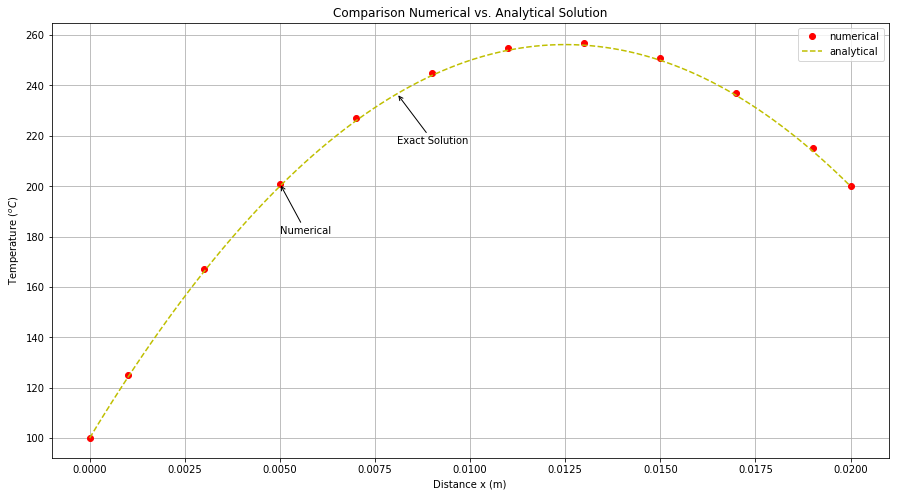

Percentage Error pada titik   0 = 0.00
Percentage Error pada titik   1 = 0.81
Percentage Error pada titik   2 = 0.60
Percentage Error pada titik   3 = 0.50
Percentage Error pada titik   4 = 0.44
Percentage Error pada titik   5 = 0.41
Percentage Error pada titik   6 = 0.39
Percentage Error pada titik   7 = 0.39
Percentage Error pada titik   8 = 0.40
Percentage Error pada titik   9 = 0.42
Percentage Error pada titik  10 = 0.47
Percentage Error pada titik  11 = 0.00


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (15, 8)
plt.title('Comparison Numerical vs. Analytical Solution')
plt.xlabel('Distance x (m)')
plt.ylabel('Temperature $(^{o}C)$')
plt.plot(axisx, y_num, 'ro', label='numerical')
plt.plot(axisx_exact, exact, 'y--', label='analytical')
plt.legend()

node_ann = 3
plt.annotate('Numerical', xy=(axisx[node_ann], y_num[node_ann]), xytext=(axisx[node_ann], y_num[node_ann]-20),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),)

mid_exact = int(nodes_exact/2)-10
plt.annotate('Exact Solution', xy=(axisx_exact[mid_exact], exact[mid_exact]),
             xytext=(axisx_exact[mid_exact], exact[mid_exact]-20),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),)
plt.grid()
plt.show()

result_exact = []
for x in axisx:
    result_exact.append(hasil_exact(x, TB, TA, L, q, k))

for counter, val in enumerate(result_exact):
    hasil = (y_num[counter] - val)/val*100
    print('Percentage Error pada titik {:3d} = {:2.2f}'.format(counter, hasil))